In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import pandas as pd
import numpy as np

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
case = pd.read_csv('1. EDA_컬럼분할, 제거.csv', header = 0, index_col = 0)

# **1. 사고원인**
---

## **1.1 사고원인 고유값 확인**

In [3]:
case['사고원인'].unique()

array(['부주의', '기타', '복장, 개인보호구의 부적절한 사용', '작업자의 단순과실',
       '타설 미흡(하중, 속도, 순서 등)', '작업중 충돌', '작업중 이동', '중량물 운반', '작업순서 미흡',
       '무모한 또는 불필요한 행위 및 동작', '전도 예방조치 미흡', '설치 미흡', '작업발판 고정 철선 절단',
       '구조물등 그밖의 위험방치 및 미확인', '자재불량에 의한 파손', '설비,기계등의 부적절한 사용 관리',
       '고소작업대 설치 미흡', '불안전한 작업자세', '주용도외 사용', '지지부재 이탈', '가설공사 전담기술자 미배치',
       '지반상태 불량', '버팀대 설치 미흡', '돌풍', '중량물 취급 미흡', '거푸집 조기 해체',
       '부재의 체결강도 미흡', '거푸집 긴결재/앵커 위치', '작업신호 불량', '작업 공간 협소',
       '절단방향 판단 오류', '로프 매듭풀림', '집중호우', '방호시설 미설치', '장비운용 미흡', '지지대 미설치',
       '철근 과적재', '조립불량', '가새 설치 미흡', '와이어로프 이탈', '자중에 의한 처짐', '이동식 비계 조정',
       '적재방법 불량', '거푸집 긴결재/앵커 해체', '장애물 충돌', '지지구조물 설치 미흡', '용접부 탈락',
       '연결부 파손', '지지대 연결부 파손', '작업자 하중', '과다한 굴착', '브레이크 파열', '파손', '토사층',
       '탈락', '소음진동', '부석 미제거', '지장물 조치 미흡', '해체방법 부적정', '흙막이 가시설 설치미흡',
       '조작 미숙', '유도자 미배치', '토압', '궤도차량 충돌', '버팀대 미설치', '토사유실', '시공순서 불량',
       '크레인줄걸이', '크레인와이어', '철근배근 미흡', '단차발생', '사면활동', '철거 잔재물 적치',
       '추진방향 판단 미흡', '부석제거 미흡'

In [4]:
reason_array = case['사고원인'].unique()
reason = pd.DataFrame(data = reason_array, columns = ['사고원인'])
reason.head()

,사고원인
0,부주의
1,기타
2,"복장, 개인보호구의 부적절한 사용"
3,작업자의 단순과실
4,"타설 미흡(하중, 속도, 순서 등)"


In [5]:
# 사고원인 고유값 파일
reason.to_csv('2_1. 사고원인.csv')

## **1.2 사고원인 분류**

- na = False → NaN이 존재하는 경우에는 na로 NaN 결과를 치환해 주도록 설정
- 참고 : https://ponyozzang.tistory.com/622
- 여러 조건으로 새로운 열 만들기 : https://www.delftstack.com/ko/howto/python-pandas/how-to-create-dataframe-column-based-on-given-condition-in-pandas/

In [6]:
import numpy as np

conditions = [
    (case['사고원인'].str.contains('집중호우|돌풍|낙뢰', na=False)),
    (case['사고원인'].str.contains('부주의|단순과실|미|불필요한|부적절한|불안전한|불량', na=False)),
    (case['사고원인'].str.contains('기타', na=False))
]

c_list = ['날씨', '사람', '기타']

case['사고원인분류'] = np.select(conditions, c_list, default = '사고')

case.head()

,사고명,기상상태,시설물 종류,인적사고,물적사고,작업프로세스,사고경위,사고원인,구체적 사고원인,사망자수,부상자수,공종대분류,공종소분류,객체대분류,객체소분류,시설장소,위치장소,부위위치,사고원인분류
1,외남동162 근린생활시설 신축공사,날씨 : 맑음기온 : 23℃습도 : 20%,"건축 - 건축물 - 근린생활시설(연면적 : 455.46㎡, 지상 2층, 지하 0층)",물체에 맞음,없음,상차 및 하역작업,철골자재(데크플레이트(슈퍼데크))를 화물차에서 지게차로 하차 적재위치에 내려놓는 중...,부주의,받침대 설치 시 측면에서 설치를 해야하나 지게차 앞에서 받침대를 설치,1,0,건축,철골공사,건설자재,데크플레이트,근린생활시설,외부,하역,사람
2,보라동 391-23 근린생활시설 및 다세대주택 신축공사 작업 착수 전 사망사고,날씨 : 흐림기온 : 22℃습도 : 50%,"건축 - 건축물 - 공동주택(연면적 : 709.85㎡, 지상 5층, 지하 0층)",질병,없음,기타,2022년04월27일 오전07시20분경 보라동 근린생활시설 및 다세대주택 신축공사 ...,기타,신축공사 현장 내 대기실에서 작업 착수 전 동료들과 모여 대기중 송**이 갑자기 쓰...,1,0,기타,기타,질병,질병,공동주택,작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망,작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망,기타
3,송산그린시티 EB4블록 형틀공 추락사고,날씨 : 흐림기온 : 15℃습도 : 74%,"건축 - 건축물 - 기타(연면적 : 24,161.30㎡, 지상 3층, 지하 1층)",찔림,없음,설치작업,2022.04.22 금요일 09시 10분경 202동 10호 다용도실에서 전기작업을 ...,기타,현장 정리정돈 미흡 및 근로자 부주의,1,0,건축,가설공사,가시설,거푸집,기타,내부,상부(위),기타
4,화성비봉 공공주택지구 조성공사,날씨 : 맑음기온 : 15℃습도 : 51%,토목 - 기타 - 부지조성,질병,없음,기타,일용근로자인 김**씨는 2022년 04월 20일 (수요일) 오전 06시57 분경에 ...,기타,개인 질병(심근경색)에 따른 사고,1,0,기타,기타,질병,질병,부지조성,내부,상부(위),기타
5,상도동 243-19 신축공사 추락사고,날씨 : 흐림기온 : 19℃습도 : 25%,"건축 - 건축물 - 단독주택(연면적 : 284.06㎡, 지상 4층, 지하 1층)",떨어짐(5미터 이상 ~ 10미터 미만),없음,해체작업,외부 비계해체작업 준비 중 작업자(비계공)가 3층 계단창을 통해 비계 및 작업발판으...,"복장, 개인보호구의 부적절한 사용",안전고리 체결 후 작업준비가 이루어져야 했으나 안전고리 미체결 등으로 사고가 발생한...,1,0,건축,가설공사,가시설,작업발판,단독주택,외벽,고소,사람


In [7]:
# 사고원인 분류 컬럼(사람, 사고, 날씨,...) 추가 파일
# case.to_csv('2_2. 사고원인 분류.csv')

# **1.3 사고원인 시각화**

In [8]:
# case.columns = ['name', 'weather', 'facility_kind', 'human_accident', 'material_accident', 'work', 'accident_sequence', 'reason', 'detail_reason', 'death', 'injury', 'type1', 'type2', 'object_class1', 'object_class2', 'place', 'location', 'detail_location', 'reason_class']

### **1.3.1 사고원인의 대분류**

c:\Users\seonghunyun\anaconda3\envs\safey_helmet\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


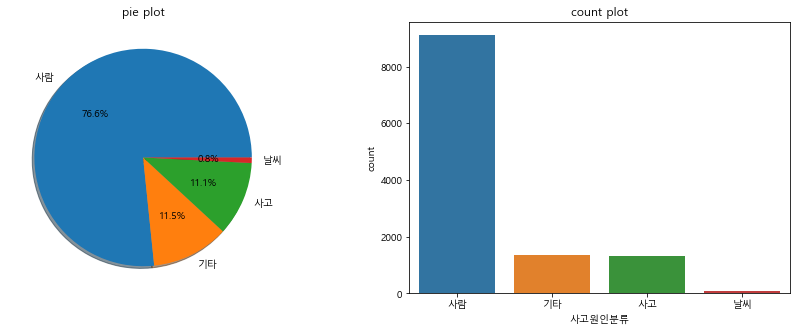

In [9]:
f, ax = plt.subplots(1, 2, figsize = (15,5))

case['사고원인분류'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('pie plot')
ax[0].set_ylabel('')

sns.countplot('사고원인분류', data = case, ax = ax[1])
ax[1].set_title('count plot')

plt.show()

In [10]:
len(case['사고원인분류'].unique())

4

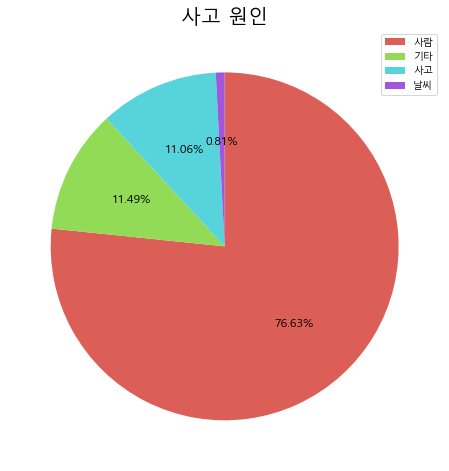

In [11]:
colors = sns.color_palette('hls', len(case['사고원인분류'].unique()))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax = fig.add_subplot()

pie = ax.pie(
    case['사고원인분류'].value_counts(),
    # labels = case['사고원인분류'].unique(),
    startangle = 90,
    counterclock = False,
    autopct = lambda p : '{:.2f}%'.format(p),
    colors = colors,
    textprops={'size': 12}
)

plt.legend(pie[0], case['사고원인분류'].unique())
plt.title('사고 원인', fontsize = 20)
plt.show()

### **1.3.2 사고원인 중 사람 관련 데이터**

In [13]:
human = case[case['사고원인분류'] == '사람']
human.head()

,사고명,기상상태,시설물 종류,인적사고,물적사고,작업프로세스,사고경위,사고원인,구체적 사고원인,사망자수,부상자수,공종대분류,공종소분류,객체대분류,객체소분류,시설장소,위치장소,부위위치,사고원인분류
1,외남동162 근린생활시설 신축공사,날씨 : 맑음기온 : 23℃습도 : 20%,"건축 - 건축물 - 근린생활시설(연면적 : 455.46㎡, 지상 2층, 지하 0층)",물체에 맞음,없음,상차 및 하역작업,철골자재(데크플레이트(슈퍼데크))를 화물차에서 지게차로 하차 적재위치에 내려놓는 중...,부주의,받침대 설치 시 측면에서 설치를 해야하나 지게차 앞에서 받침대를 설치,1,0,건축,철골공사,건설자재,데크플레이트,근린생활시설,외부,하역,사람
5,상도동 243-19 신축공사 추락사고,날씨 : 흐림기온 : 19℃습도 : 25%,"건축 - 건축물 - 단독주택(연면적 : 284.06㎡, 지상 4층, 지하 1층)",떨어짐(5미터 이상 ~ 10미터 미만),없음,해체작업,외부 비계해체작업 준비 중 작업자(비계공)가 3층 계단창을 통해 비계 및 작업발판으...,"복장, 개인보호구의 부적절한 사용",안전고리 체결 후 작업준비가 이루어져야 했으나 안전고리 미체결 등으로 사고가 발생한...,1,0,건축,가설공사,가시설,작업발판,단독주택,외벽,고소,사람
6,범어동 13-8번지 상 근린생활시설 증축공사 건설사고,날씨 : 맑음기온 : 15℃습도 : 40%,"건축 - 건축물 - 근린생활시설(연면적 : 585㎡, 지상 4층, 지하 0층)",떨어짐(5미터 이상 ~ 10미터 미만),없음,운반작업,배면 판넬작업 중 2층 지붕작업을 준비하는 중에 2명이 후레싱을 이동하는 도중 몸이...,작업자의 단순과실,"지상2층 외부(지붕)에서 자재 운반도중 1명은 바닥으로 낙하(사망), 1명은 비계발...",1,1,건축,금속공사,건설자재,자재,근린생활시설,외부,고소,사람
7,아파트 도색작업 준비중 추락사고,날씨 : 맑음기온 : 15℃습도 : 40%,"건축 - 건축물 - 공동주택(연면적 : 0㎡, 지상 15층, 지하 0층)",떨어짐(10미터 이상),없음,이동,도색작업중 사고추정(추락),부주의,도색작업 준비중 사다리에서 이동하다 추락추정,1,0,건축,도장공사,건설공구,사다리,공동주택,옥상,옥상,사람
9,대전 선화동 106-1 일원 주상복합 신축공사 안전사고,날씨 : 맑음기온 : 26℃습도 : 61%,"건축 - 건축물 - 공동주택(연면적 : 192,677.08㎡, 지상 49층, 지하 ...",떨어짐(3미터 이상 ~ 5미터 미만),붕괴,타설작업,"101동 주변주차장 (X25 ~ 26, Y4 ~ Y5) NRC보 와 데크 만나는 부...","타설 미흡(하중, 속도, 순서 등)",지상1층 바닥 슬래브 타설 시 girder(큰보)와 슬래브 일부분에 압력 및 충격하...,0,4,건축,철근콘크리트공사,가시설,거푸집,공동주택,내부,바닥,사람


In [14]:
conditions = [
    (human['사고원인'].str.contains('부주의', na=False)),
    (human['사고원인'].str.contains('단순과실', na=False)),
    (human['사고원인'].str.contains('미', na=False)),
    (human['사고원인'].str.contains('불필요', na=False)),
    (human['사고원인'].str.contains('부적절', na=False)),
    (human['사고원인'].str.contains('불안전', na=False)),
    (human['사고원인'].str.contains('불량', na=False)),
    (human['사고원인'].str.contains('기타', na=False))
]

c_list = ['부주의', '단순과실', '진행안함', '불필요', '부적절', '불안전', '불량', '기타']

human['사고원인분류2'] = np.select(conditions, c_list, default = '기타')

human.head()

c:\Users\seonghunyun\anaconda3\envs\safey_helmet\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,사고명,기상상태,시설물 종류,인적사고,물적사고,작업프로세스,사고경위,사고원인,구체적 사고원인,사망자수,부상자수,공종대분류,공종소분류,객체대분류,객체소분류,시설장소,위치장소,부위위치,사고원인분류,사고원인분류2
1,외남동162 근린생활시설 신축공사,날씨 : 맑음기온 : 23℃습도 : 20%,"건축 - 건축물 - 근린생활시설(연면적 : 455.46㎡, 지상 2층, 지하 0층)",물체에 맞음,없음,상차 및 하역작업,철골자재(데크플레이트(슈퍼데크))를 화물차에서 지게차로 하차 적재위치에 내려놓는 중...,부주의,받침대 설치 시 측면에서 설치를 해야하나 지게차 앞에서 받침대를 설치,1,0,건축,철골공사,건설자재,데크플레이트,근린생활시설,외부,하역,사람,부주의
5,상도동 243-19 신축공사 추락사고,날씨 : 흐림기온 : 19℃습도 : 25%,"건축 - 건축물 - 단독주택(연면적 : 284.06㎡, 지상 4층, 지하 1층)",떨어짐(5미터 이상 ~ 10미터 미만),없음,해체작업,외부 비계해체작업 준비 중 작업자(비계공)가 3층 계단창을 통해 비계 및 작업발판으...,"복장, 개인보호구의 부적절한 사용",안전고리 체결 후 작업준비가 이루어져야 했으나 안전고리 미체결 등으로 사고가 발생한...,1,0,건축,가설공사,가시설,작업발판,단독주택,외벽,고소,사람,부적절
6,범어동 13-8번지 상 근린생활시설 증축공사 건설사고,날씨 : 맑음기온 : 15℃습도 : 40%,"건축 - 건축물 - 근린생활시설(연면적 : 585㎡, 지상 4층, 지하 0층)",떨어짐(5미터 이상 ~ 10미터 미만),없음,운반작업,배면 판넬작업 중 2층 지붕작업을 준비하는 중에 2명이 후레싱을 이동하는 도중 몸이...,작업자의 단순과실,"지상2층 외부(지붕)에서 자재 운반도중 1명은 바닥으로 낙하(사망), 1명은 비계발...",1,1,건축,금속공사,건설자재,자재,근린생활시설,외부,고소,사람,단순과실
7,아파트 도색작업 준비중 추락사고,날씨 : 맑음기온 : 15℃습도 : 40%,"건축 - 건축물 - 공동주택(연면적 : 0㎡, 지상 15층, 지하 0층)",떨어짐(10미터 이상),없음,이동,도색작업중 사고추정(추락),부주의,도색작업 준비중 사다리에서 이동하다 추락추정,1,0,건축,도장공사,건설공구,사다리,공동주택,옥상,옥상,사람,부주의
9,대전 선화동 106-1 일원 주상복합 신축공사 안전사고,날씨 : 맑음기온 : 26℃습도 : 61%,"건축 - 건축물 - 공동주택(연면적 : 192,677.08㎡, 지상 49층, 지하 ...",떨어짐(3미터 이상 ~ 5미터 미만),붕괴,타설작업,"101동 주변주차장 (X25 ~ 26, Y4 ~ Y5) NRC보 와 데크 만나는 부...","타설 미흡(하중, 속도, 순서 등)",지상1층 바닥 슬래브 타설 시 girder(큰보)와 슬래브 일부분에 압력 및 충격하...,0,4,건축,철근콘크리트공사,가시설,거푸집,공동주택,내부,바닥,사람,진행안함


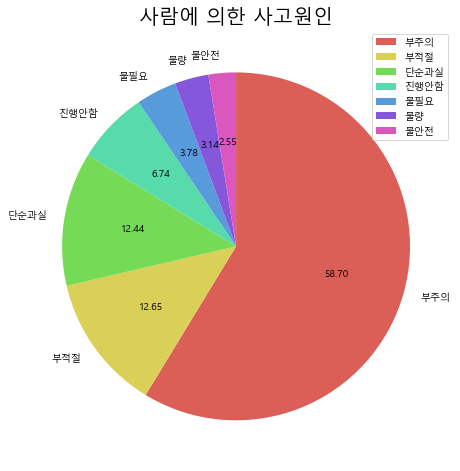

In [15]:
colors = sns.color_palette('hls', len(human['사고원인분류2'].unique()))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax = fig.add_subplot()

pie = ax.pie(
    human['사고원인분류2'].value_counts(),
    labels = human['사고원인분류2'].unique(),
    startangle = 90,
    counterclock = False,
    autopct = lambda p : '{:.2f}'.format(p),
    colors = colors
)

plt.legend(pie[0], human['사고원인분류2'].unique())
plt.title('사람에 의한 사고원인', fontsize = 20)
plt.show()

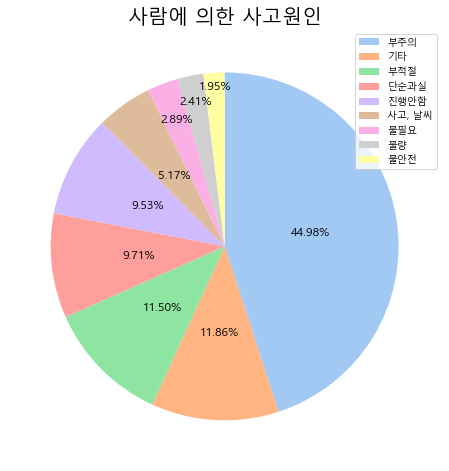

In [26]:
labels = case['사고원인분류2'].unique()
colors = sns.color_palette('pastel')
frequency = case['사고원인분류2'].value_counts()

labels_frequency = zip(labels, frequency, colors)
labels_frequency = sorted(labels_frequency, key=lambda x : x[1], reverse=True)

sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax = fig.add_subplot()

pie = ax.pie(
    sorted_frequency,
    startangle = 90,
    counterclock = False,
    # autopct = lambda p : '{:.2f}'.format(p),
    colors = colors
)

total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0
count_less_5pct = 4 ## 5%보다 작은 라벨의 개수
spacing = 0.07
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],sorted_labels) ## 범례
plt.title('사람에 의한 사고원인', fontsize = 20)
plt.show()

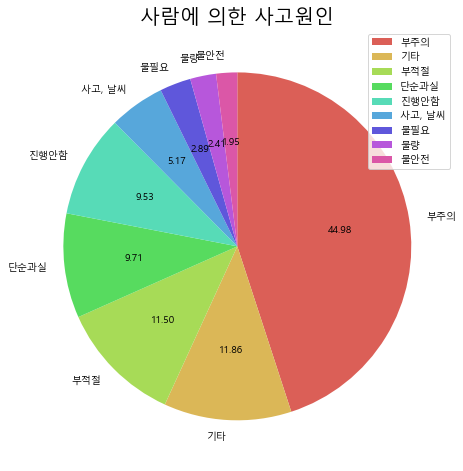

In [17]:
colors = sns.color_palette('hls', len(case['사고원인분류2'].unique()))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax = fig.add_subplot()

pie = ax.pie(
    case['사고원인분류2'].value_counts(),
    labels = case['사고원인분류2'].unique(),
    startangle = 90,
    counterclock = False,
    autopct = lambda p : '{:.2f}'.format(p),
    colors = colors
)

plt.legend(pie[0], case['사고원인분류2'].unique())
plt.title('사람에 의한 사고원인', fontsize = 20)
plt.show()

# **4. 시설장소, 위치장소**
---

In [165]:
case['시설장소'].unique()

array(['근린생활시설', '공동주택', '기타', '부지조성', '단독주택', '제철공장', '공장', '하수도',
       '창고시설', '교육연구시설', '제방(통관/호안)', '업무시설', '운동시설', '노유자시설', nan,
       '종교시설', '철도터널', '보', '숙박시설', '수련시설', '문화 및 집회시설', '도로', '간척매립',
       '교정 및 군사시설', '자동차 관련시설', '의료시설', '도로교량', '지하차도', '방송통신시설', '운수시설',
       '도로터널', '환경오염방지시설', '지하철', '일반 및 고속철도', '계류시설', '판매시설', '수문/통문',
       '석유화학공장', '상수도', '동물 및 식물 관련시설', '옹벽', '위험물 저장 및 처리시설', '호안',
       '방파제', '하수처리시설', '절토사면', '용수전용댐', '철도교량', '묘지관련시설', '공공폐수처리시설',
       '소각장', '관개수로', '수처리설비시설', '배수펌프장', '관광 휴게시설', '위락시설', '장례시설',
       '중수도/하폐수처리수 재이용시설', '갑문', '다목적댐', '파제제', '복개구조물', '홍수전용댐'],
      dtype=object)

In [166]:
case['위치장소'].unique()

array(['외부', '작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망', '내부', '외벽', '옥상', '인접주변',
       '현장 밖 임차 현장사무실', 'PIT층 외벽', '북측 매립지 2구역', '현장내(지하6층)', '진입로(램프)',
       '지붕', '외부 주행로', '기초바닥타설', '인근 현장사무소', '현장내', '농업용수로 매설부(C3)',
       '108동 1단 낙하물 방지망', '공사현장 출입구', '도로 포장 지점(부안읍 학동길)', '2층에서1층으로추락',
       '저수지(권양기) 인근', '강진군 칠량면 영동리1075-1', '밴트', '현장 내 철근작업장', '기초 바닥',
       '공사현장 내부', '현장사무실', '현장 시험실 콘테이너 내부', '공사현장 내', '지반토공사현장',
       '106동 주차장', '부잔교호안', '4.5 박스 작업장에서', '건물 입구', '103동 인근', '철골작업중',
       '정거장 인근 개착부 줄파기', '하자포리 4-6', '종점부', '안전가설설치 및 해체', '귀', '기초',
       '지하2층 합벽', '현장 3구간 워킹타워 주변', '코로나19 확진', '생물반응조 설치 현장',
       '103동 지상4층', '주차장 슬라브', '용접작업장', '가물막이', '지상8층 옥상', '내부 3층 엘리베이터',
       '환기구#3 B/P장', '109동 10층 바닥', '콘크리트블록 상단', '기초 파일공사', 'T/C 운반장소',
       '파일 야적장', '덕진구 전당길24', '측구', '줄파기 작업구간', '말뚝 기초부', '거더 상부', '105동',
       '맨홀외부 천공작업', '주차장 공사현장', '거더제작장', '충남 서천군 장항읍 화천리 219-1',
       '지하층 터파기공사 중', '기계식주차장 비계', '사동리 72-1 배수지', 'PC거더 제작장', '지상3층 계단실',
       '

In [168]:
# '시설장소' 기준으로 '위치장소'의 갯수
location = case['위치장소'].groupby(case['시설장소'])
location.size()

시설장소
간척매립           8
갑문             2
계류시설          30
공공폐수처리시설      14
공동주택        3387
            ... 
하수도          305
하수처리시설        50
호안            19
홍수전용댐          1
환경오염방지시설      19
Name: 위치장소, Length: 62, dtype: int64

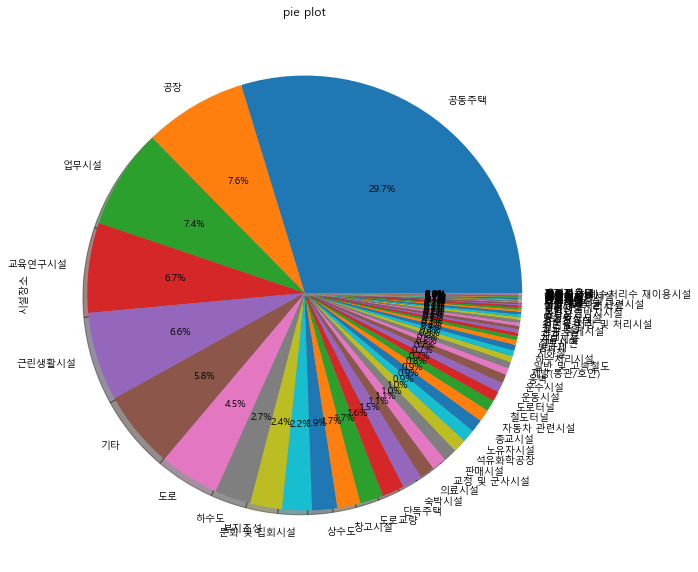

In [169]:
# '시설장소' 비율
fig = plt.figure(figsize=(10,10))

case['시설장소'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True)
plt.title('pie plot')

plt.show()

In [170]:
location_list = location.unique().reset_index()
location_list

,시설장소,위치장소
0,간척매립,"[북측 매립지 2구역, 준설선, 제방구간 연약지반, 외부, 내부]"
1,갑문,"[외부, nan]"
2,계류시설,"[인접주변, 외부, 콘크리트블록 상단, 내부, 해양작업선, 블록제작장 내, 제작장,..."
3,공공폐수처리시설,"[내부, 외부, 지하1층 램프구간, 인접주변, nan]"
4,공동주택,"[작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망, 옥상, 내부, 외부, 현장..."
...,...,...
57,하수도,"[외부, 인접주변, 내부, 도로 포장 지점(부안읍 학동길), 생물반응조 설치 현장,..."
58,하수처리시설,"[내부, 인접주변, 외부, 세륜기 주변, 현장 사무실, nan]"
59,호안,"[종점부, 외부, 인접주변, 내부, 당월리 해상, 동해항15번선석, 신규투기장, 얕..."
60,홍수전용댐,[외부]


In [172]:
location_list.to_csv('2_5. 장소 리스트.csv')

# **5. 부위**
---

In [175]:
print(case['부위위치'].unique())
print(len(case['부위위치'].unique()))

['하역' '작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망' '상부(위)' ... '출입문 개폐' '현장내' '방지망 파이프']
1208


In [178]:
# '부위내용(=객체소분류)' 기준으로 '부위위치'의 갯수
part = case['부위위치'].groupby(case['객체소분류'])
part.size()

객체소분류
PSC빔          7
RCS발판         2
가물막이          1
가설계단         92
가설도로          8
           ... 
파형강판          5
핀            38
항타 및 항발기     82
현장타설말뚝        1
흙막이가시설      257
Name: 부위위치, Length: 114, dtype: int64

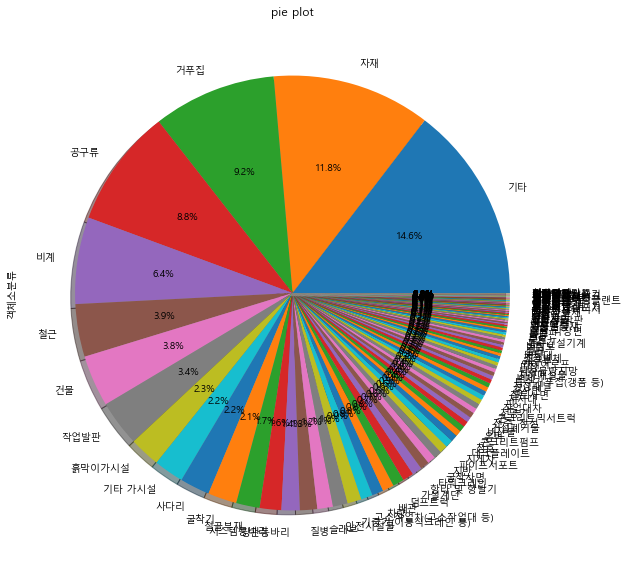

In [179]:
# '객체소분류' 비율
fig = plt.figure(figsize=(10,10))

case['객체소분류'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True)
plt.title('pie plot')

plt.show()

In [180]:
part_list = part.unique().reset_index()
part_list

,객체소분류,부위위치
0,PSC빔,"[하부(아래), 거더 강연선 정착대, 상부(위), nan]"
1,RCS발판,[바닥]
2,가물막이,[바닥]
3,가설계단,"[바닥, 지하, 가설계단에서, 고소, 상부(위), 하부(아래), 옥상계단발판하부, ..."
4,가설도로,"[앞, 지하차도 입구, nan]"
...,...,...
109,파형강판,"[하부(아래), 바닥, 상부(위)]"
110,핀,"[바닥, 101동 6층 계단실, 옆, 앞, 지하, 핀이 튐, 하부(아래), 고소, ..."
111,항타 및 항발기,"[옆, 조종석 옆 발판, 리더옆, 하부(아래), 바닥, 철근망 관입중 끼임, 앞, ..."
112,현장타설말뚝,[바닥]


In [181]:
part_list.to_csv('2_6. 부위 리스트.csv')

# **6. 시설물 종류**
---

In [232]:
# 세부적으로 컬럼 분할
case['시설물 대분류'] = case['시설물 종류'].str.split(' - ').str[0]
case['시설물 중분류'] = case['시설물 종류'].str.split(' - ').str[1]
case['시설물 소분류(상세)'] = case['시설물 종류'].str.split(' - ').str[2]

case['시설물 소분류'] = case['시설물 소분류(상세)'].str.split('(').str[0]

# 분할한 '시설물 종류' 컬럼은 제거
case = case.drop(['시설물 종류'], axis = 1)

case.head()

,사고명,기상상태,인적사고,물적사고,작업프로세스,사고경위,사고원인,구체적 사고원인,사망자수,부상자수,...,공종소분류,객체대분류,객체소분류,시설장소,위치장소,부위위치,시설물 대분류,시설물 중분류,시설물 소분류(상세),시설물 소분류
1,외남동162 근린생활시설 신축공사,날씨 : 맑음기온 : 23℃습도 : 20%,물체에 맞음,없음,상차 및 하역작업,철골자재(데크플레이트(슈퍼데크))를 화물차에서 지게차로 하차 적재위치에 내려놓는 중...,부주의,받침대 설치 시 측면에서 설치를 해야하나 지게차 앞에서 받침대를 설치,1,0,...,철골공사,건설자재,데크플레이트,근린생활시설,외부,하역,건축,건축물,"근린생활시설(연면적 : 455.46㎡, 지상 2층, 지하 0층)",근린생활시설
2,보라동 391-23 근린생활시설 및 다세대주택 신축공사 작업 착수 전 사망사고,날씨 : 흐림기온 : 22℃습도 : 50%,질병,없음,기타,2022년04월27일 오전07시20분경 보라동 근린생활시설 및 다세대주택 신축공사 ...,기타,신축공사 현장 내 대기실에서 작업 착수 전 동료들과 모여 대기중 송**이 갑자기 쓰...,1,0,...,기타,질병,질병,공동주택,작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망,작업 착수 전 대기중에 쓰러져 병원으로 이송하여 사망,건축,건축물,"공동주택(연면적 : 709.85㎡, 지상 5층, 지하 0층)",공동주택
3,송산그린시티 EB4블록 형틀공 추락사고,날씨 : 흐림기온 : 15℃습도 : 74%,찔림,없음,설치작업,2022.04.22 금요일 09시 10분경 202동 10호 다용도실에서 전기작업을 ...,기타,현장 정리정돈 미흡 및 근로자 부주의,1,0,...,가설공사,가시설,거푸집,기타,내부,상부(위),건축,건축물,"기타(연면적 : 24,161.30㎡, 지상 3층, 지하 1층)",기타
4,화성비봉 공공주택지구 조성공사,날씨 : 맑음기온 : 15℃습도 : 51%,질병,없음,기타,일용근로자인 김**씨는 2022년 04월 20일 (수요일) 오전 06시57 분경에 ...,기타,개인 질병(심근경색)에 따른 사고,1,0,...,기타,질병,질병,부지조성,내부,상부(위),토목,기타,부지조성,부지조성
5,상도동 243-19 신축공사 추락사고,날씨 : 흐림기온 : 19℃습도 : 25%,떨어짐(5미터 이상 ~ 10미터 미만),없음,해체작업,외부 비계해체작업 준비 중 작업자(비계공)가 3층 계단창을 통해 비계 및 작업발판으...,"복장, 개인보호구의 부적절한 사용",안전고리 체결 후 작업준비가 이루어져야 했으나 안전고리 미체결 등으로 사고가 발생한...,1,0,...,가설공사,가시설,작업발판,단독주택,외벽,고소,건축,건축물,"단독주택(연면적 : 284.06㎡, 지상 4층, 지하 1층)",단독주택


In [233]:
case['시설물 대분류'].unique()

array(['건축', '토목', '산업환경설비', '조경'], dtype=object)

In [234]:
case['시설물 중분류'].unique()

array(['건축물', '기타', '산업생산시설', '상하수도', '하천', '발전시설', '터널', '도로', '교량',
       '공동구', '환경시설', '항만', '옹벽 및 절토사면', '철도', '댐', '공원', '숲', '생태공원',
       '정원', '수목원'], dtype=object)

In [235]:
case['시설물 소분류'].unique()

array(['근린생활시설', '공동주택', '기타', '부지조성', '단독주택', '제철공장', '공장', '하수도',
       '창고시설', '교육연구시설', '제방', '업무시설', '운동시설', '노유자시설', '', '종교시설',
       '철도터널', '보', '숙박시설', '수련시설', '문화 및 집회시설', '도로', '간척매립',
       '교정 및 군사시설', '자동차 관련시설', '의료시설', '도로교량', '지하차도', '방송통신시설', '운수시설',
       '도로터널', '환경오염방지시설', '지하철', '일반 및 고속철도', '계류시설', '판매시설', '수문/통문',
       '석유화학공장', '상수도', '동물 및 식물 관련시설', '옹벽', '위험물 저장 및 처리시설', '호안',
       '방파제', '하수처리시설', '절토사면', '용수전용댐', '철도교량', '묘지관련시설', '공공폐수처리시설',
       '소각장', '관개수로', '수처리설비시설', '배수펌프장', '관광 휴게시설', '위락시설', '장례시설',
       '중수도/하폐수처리수 재이용시설', '갑문', '다목적댐', '파제제', '복개구조물', '홍수전용댐'],
      dtype=object)

In [236]:
case['시설물 소분류(상세)'].unique()

array(['근린생활시설(연면적 : 455.46㎡, 지상 2층, 지하 0층) ',
       '공동주택(연면적 : 709.85㎡, 지상 5층, 지하 0층) ',
       '기타(연면적 : 24,161.30㎡, 지상 3층, 지하 1층) ', ...,
       '교육연구시설(연면적 : 1,688㎡, 지상 3층, 지하 1층) ',
       '근린생활시설(연면적 : 1,179.49㎡, 지상 4층, 지하 0층) ',
       '교육연구시설(연면적 : 5,224.42㎡, 지상 4층, 지하 1층) '], dtype=object)

In [259]:
# '시설물 대분류, 시설물 중분류' 기준으로 '시설물 소분류'의 갯수
facility = case['시설물 소분류'].groupby([case['시설물 대분류'], case['시설물 중분류']])
facility.size()

시설물 대분류  시설물 중분류  
건축       건축물          8672
산업환경설비   발전시설          327
         산업생산시설        119
         환경시설          114
조경       공원             37
         기타             63
         생태공원            4
         수목원             2
         숲               8
         정원              5
토목       공동구             5
         교량            247
         기타            316
         댐              40
         도로            610
         상하수도          597
         옹벽 및 절토사면     109
         철도            115
         터널            217
         하천            179
         항만            135
Name: 시설물 소분류, dtype: int64

In [260]:
facility_list = facility.unique().reset_index()
facility_list

,시설물 대분류,시설물 중분류,시설물 소분류
0,건축,건축물,"[근린생활시설, 공동주택, 기타, 단독주택, 공장, 창고시설, 교육연구시설, 업무시..."
1,산업환경설비,발전시설,[]
2,산업환경설비,산업생산시설,"[제철공장, 석유화학공장, ]"
3,산업환경설비,환경시설,"[환경오염방지시설, 하수처리시설, 공공폐수처리시설, 소각장, 수처리설비시설, 중수도..."
4,조경,공원,[]
5,조경,기타,[]
6,조경,생태공원,[]
7,조경,수목원,[]
8,조경,숲,[]
9,조경,정원,[]


In [261]:
facility_list.to_csv('2_7. 시설물 리스트.csv')

# **7. 작업 프로세스**
---

In [248]:
case['작업프로세스'].unique()

array(['상차 및 하역작업', '기타', '설치작업', '해체작업', '운반작업', '이동', '형틀 및 목공', '타설작업',
       '준비작업', '굴착작업', '양중작업', '조립작업', '마감작업', '정리작업', '청소작업', '반출작업',
       '연결작업', '적재작업', '설비작업', '인양작업', '도장작업', '절단작업', '정비작업', '고소작업',
       '전기작업', '쌓기작업', '양생작업', '보수 및 교체작업', '매설작업', '벌목작업', '천공작업',
       '항타 및 항발작업', '확인 및 점검작업', '부설 및 다짐작업', '용접작업', '거치작업', '물뿌리기 작업',
       '측량작업', '절취작업', '장약 및 발파작업', '인발작업', nan, '철근조립작업', '자재정리', '장비이동',
       '자재이동', '정지작업', '점검', '장비청소', '제거작업', '평탄작업', '철거작업', '작업장 출입',
       '고정작업', '돌붙임 및 줄눈 작업', '수정작업', '다짐작업', '교체작업', '토사하역', '상차작업',
       '전기배선작업'], dtype=object)

In [249]:
process_array = case['작업프로세스'].unique()
process = pd.DataFrame(data = process_array, columns = ['작업프로세스'])
process.head()

,작업프로세스
0,상차 및 하역작업
1,기타
2,설치작업
3,해체작업
4,운반작업


In [250]:
process.to_csv('2_8. 작업프로세스 리스트.csv')

In [251]:
case.to_csv('2. EDA_원인분석, 고유값.csv')